# KNN based classifier to predict digits from images of handwritten digits in the dataset

In [38]:
import numpy as np
import pandas as pd
from numpy.random import RandomState
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [12]:
def accuracy(y_real, y_pred):
#    print("y_real ",len(y_real))
#    print("y_pred ",len(y_pred))
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

In [13]:
def euclidean_distance(row):
    return np.sqrt(np.sum((X_train - row) ** 2, axis=1))

In [14]:
def manhattan_distance(row):
    return np.sum(np.abs(X_train-row), axis = 1)

In [15]:
def prediction(row,k):
    dist = euclidean_distance(row)
    indexes = np.argsort(dist)[:k]
    neighbors = Y_train[indexes]
    match = Counter(neighbors).most_common(1)
    #print(match[0][0])
    return match[0][0]

In [16]:
def prediction_manhattan(row,k):
    dist = manhattan_distance(row)
    indexes = np.argsort(dist)[:k]
    neighbors = Y_train[indexes]
    match = Counter(neighbors).most_common(1)
    #print(match[0][0])
    return match[0][0]

In [17]:
def predict(k):
    y_pred = [prediction(x,k) for x in X_validation]
    return np.array(y_pred)

In [18]:
def predict_euclidean(k):
    y_pred = [prediction(x,k) for x in X_test]
    return np.array(y_pred)

In [19]:
def predict_manhattan(k):
    y_pred = [prediction_manhattan(x,k) for x in X_validation]
    return np.array(y_pred)

In [20]:
df = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q1/dataset/train.csv',header = None)
rng = RandomState()
train = df.sample(frac=0.8,random_state = rng)
validation = df.loc[~df.index.isin(train.index)]
X_train,Y_train = train.iloc[:,1:], train.iloc[:,0]
X_validation,Y_validation = validation.iloc[:, 1:], validation.iloc[:,0]
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_validation = np.array(X_validation)
Y_validation = np.array(Y_validation)

# Prediction on test data set with K =3 on euclidean distance classifier as its accuracy is higher than other experiments.

In [31]:
df_test = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q1/dataset/test.csv',header = None)
#print(df_test.shape)
X_test = df_test.to_numpy()
#print(len(X_test))
Y_temp_test = list()
with open("/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q1/dataset/test_labels.csv") as f:
  for line in f:
    if(line == '\n'):
        continue
    Y_temp_test.append(int(line))
Y_test = np.array(Y_temp_test)
predictions_k = predict_euclidean(4)
accuracy(Y_test, predictions_k)

0.961

# Confusion Matrix using k = 3

In [33]:
print(confusion_matrix(Y_test, predictions_k))

[[ 92   0   0   0   0   1   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   0 105   1   0   0   0   2   0   0]
 [  0   0   0 107   0   1   0   0   0   0]
 [  0   1   0   0  82   0   1   0   0   7]
 [  0   1   0   1   0  78   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   2   1   0   1   0   0  98   0   2]
 [  1   1   1   1   0   3   0   0  93   0]
 [  1   0   1   0   2   1   0   1   1 105]]


# Classification Report using k = 3

In [34]:
print(classification_report(Y_test, predictions_k))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.95      0.99      0.97       101
           2       0.97      0.97      0.97       108
           3       0.96      0.99      0.98       108
           4       0.96      0.90      0.93        91
           5       0.93      0.96      0.95        81
           6       0.98      1.00      0.99       101
           7       0.97      0.94      0.96       104
           8       0.98      0.93      0.95       100
           9       0.92      0.94      0.93       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



# Classification using scikit-learn’s kNN classifier

In [32]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, Y_train)
knn_pred = classifier.predict(X_test)
accuracy(Y_test,knn_pred)

0.956

# Confusion matrix with Sklearn knn classifier

In [35]:
print(confusion_matrix(Y_test, knn_pred))

[[ 92   0   0   0   0   1   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   2   0   0]
 [  0   0   0 107   0   1   0   0   0   0]
 [  0   1   0   0  83   0   1   0   0   6]
 [  0   1   0   1   0  78   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   4   1   0   2   0   0  95   0   2]
 [  1   1   1   1   0   4   0   0  92   0]
 [  2   0   1   0   3   1   0   2   1 102]]


# Classification report with sklearn KNN classifier

In [36]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.93      0.99      0.96       101
           2       0.97      0.98      0.98       108
           3       0.97      0.99      0.98       108
           4       0.94      0.91      0.93        91
           5       0.92      0.96      0.94        81
           6       0.98      1.00      0.99       101
           7       0.96      0.91      0.94       104
           8       0.98      0.92      0.95       100
           9       0.93      0.91      0.92       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Accuracy using euclidean distance with k = 3

In [21]:
predictions_3 = predict(3)
accuracy(Y_validation, predictions_3)

0.9595

Accuracy using euclidean distance with k = 2

In [22]:
predictions_2 = predict(2)
accuracy(Y_validation, predictions_2)

0.9555

Accuracy using euclidean distance with k = 1

In [23]:
predictions_1 = predict(1)
accuracy(Y_validation, predictions_1)

0.9555

Accuracy using euclidean distance with k = 4

In [24]:
predictions_4 = predict(4)
accuracy(Y_validation, predictions_4)

0.96

Accuracy using euclidean distance with k = 5

In [25]:
predictions_5 = predict(5)
accuracy(Y_validation, predictions_5)

0.959

Accuracy using manhattan distance with k = 1

In [26]:
man_predictions_1 = predict_manhattan(1)
accuracy(Y_validation, man_predictions_1)

0.949

Accuracy using manhattan distance with k = 2

In [27]:
man_predictions_2 = predict_manhattan(2)
accuracy(Y_validation, man_predictions_2)

0.949

Accuracy using manhattan distance with k = 3

In [28]:
man_predictions_3 = predict_manhattan(3)
accuracy(Y_validation, man_predictions_3)

0.95175

Accuracy using manhattan distance with k = 4

In [29]:
man_predictions_4 = predict_manhattan(4)
accuracy(Y_validation, man_predictions_4)

0.95375

Accuracy using manhattan distance with k = 5

In [30]:
man_predictions_5 = predict_manhattan(5)
accuracy(Y_validation, man_predictions_5)

0.95275

# With my own classifier setting k = 4 the accuracy is 0.96 on test data set. with sklearn classifier the accuracy is 0.956 on test data.

# Plotting of graph using different K value for eulclidean distance measurement

Text(0, 0.5, 'Testing Accuracy')

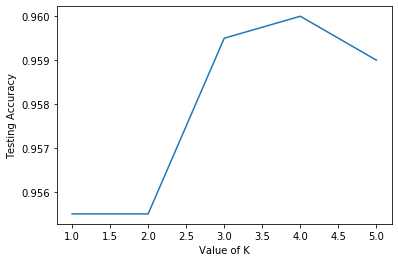

In [39]:
k = [1,2,3,4,5]
euc_list= [0.9555,0.9555,0.9595,0.96,0.959]
plt.plot(k,euc_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

# Plotting of graph using different K value for manhattan distance measurement

Text(0, 0.5, 'Testing Accuracy')

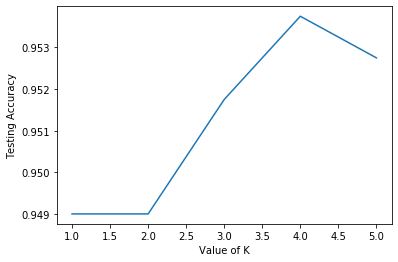

In [40]:
k = [1,2,3,4,5]
man_list= [0.949,0.949,0.95175,0.95375,0.95275]
plt.plot(k,man_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")